# Loan Application Status Prediction

# Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

# Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

# Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

# Importing Neccessary Libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, power_transform
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score, roc_curve, roc_auc_score,accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
import xgboost 
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
df = pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Dropping Loan Id Col which is of least significant
df.drop(['Loan_ID'],axis=1,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis(EDA)

Firstly to understand about the dataset, we should know how much data is there in the dataset. 

In [4]:
# Checking the dimensions of this dataset.
df.shape

(614, 12)

- Dataset has 614 rows & 12 Cols.

In [5]:
# checkng the columns present in the dataset.
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# To confirm about the first prediction right, Cheching the datatypes of all the columns.
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
# For getting the overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


- datasets has 4 float variables, 1 int variable & 7 object variables.

In [8]:
# checking the null values in the dataframe
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- Both object & continous variables having missing values.
- Objects Missing value is treated in Objects dataframe after separating datasets into numeric & objects.
- Numeric missing value is treated after labelencoded dataframe.
- Gender,Dependents,Self_Employed Objects Variables shows Missing Values.

In [9]:
#Check for duplicate data
df.duplicated().sum()

0

In [10]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

- Target Col has Class imbalance problem which is treated later.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

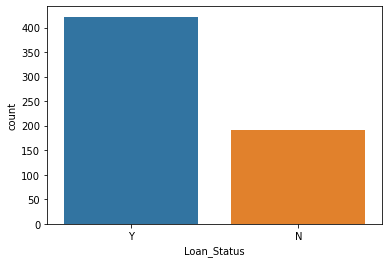

In [11]:
sns.countplot(df['Loan_Status'])

- Target Col showing loan status as Y has highest value of 422.

In [12]:
numerics = ['float64', 'int64']
numeric = df.select_dtypes(include=numerics)
objects = df.select_dtypes(exclude=numerics)

- Datasets is divided into numerics & Objects for better EDA

In [13]:
objects.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [14]:
objects.describe()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


- Target cols has 2 unique class Y & N where class Y has hieghest value.
- Dependent cols has 4 unique class where the dependents is 0 for loan approval.
- Similar analysis can be made for other variables.

In [15]:
numeric.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


- There are 5 Numeric Variables in Numeric dataframe.
- Mean is greater then 50% percentile in ApplicantIncome col also std is high.
- There is hughe diff in Max & 75th Percentile in ApplicantIncome & LoanAmount Col.
- The Number of rows in Loanamount,Loan_amount_term & Credit_History col is 592,600 & 564.
- As per above obs it seems those cols datsets has skewness, outliers & Missing Values.

# Data Visualization

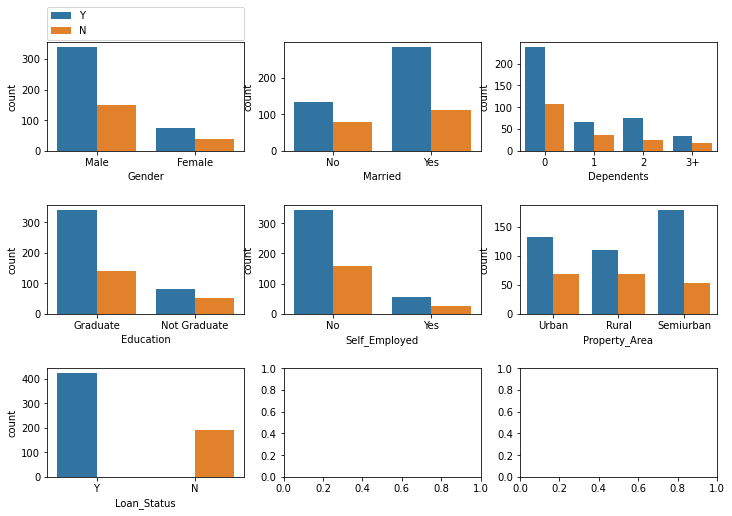

In [16]:
fig,ax =plt.subplots(3,3,figsize=(12,8))
fig.subplots_adjust(hspace=.5)
for i in range(0,7):
    g = sns.countplot(x=objects.iloc[:,i], hue=objects["Loan_Status"], ax=ax[divmod(i,3)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()

- Gender col has two class male & female where male count is more then female class.
- Also %age Loan_status as Y in male class is high.
- Married couple count is more
- The Count of 0 dependents is high as compared to no of dependents.
- For loan application there are more person who are graduate's.
- Self employed person are less.
- More application seen for semiurban area.
- Loan status Y count is more then N.

# Missing Value in Objects dataframe

In [17]:
objects.isnull().sum()

Gender           13
Married           3
Dependents       15
Education         0
Self_Employed    32
Property_Area     0
Loan_Status       0
dtype: int64

In [18]:
# Gender,Married, Dependents & Self_Employed has missing value

objects['Gender'].fillna(objects['Gender'].value_counts().idxmax(),inplace=True)
objects['Married'].fillna(objects['Married'].value_counts().idxmax(),inplace=True)
objects['Dependents'].fillna(objects['Dependents'].value_counts().idxmax(),inplace=True)
objects['Self_Employed'].fillna(objects['Self_Employed'].value_counts().idxmax(),inplace=True)

- Missing value is treated with frequency counts as above

In [19]:
objects.isnull().sum()

Gender           0
Married          0
Dependents       0
Education        0
Self_Employed    0
Property_Area    0
Loan_Status      0
dtype: int64

- No Missing value seen in object cols after treatment.

# Labelencoder

In [20]:
# categorical variable encoding
cat_vars_list = objects.columns.tolist()
le = LabelEncoder()
for i in cat_vars_list :
    df[i] = le.fit_transform(df[i])

In [21]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


- The dataframe shows labelencoded objects variables for further treatment and analysis.

In [22]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- Numeric cols (LoanAmount,Loan_Amount_Term & Credit_History) has missing value which is treated below as per the distribution of data.

In [23]:
df.skew()

Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

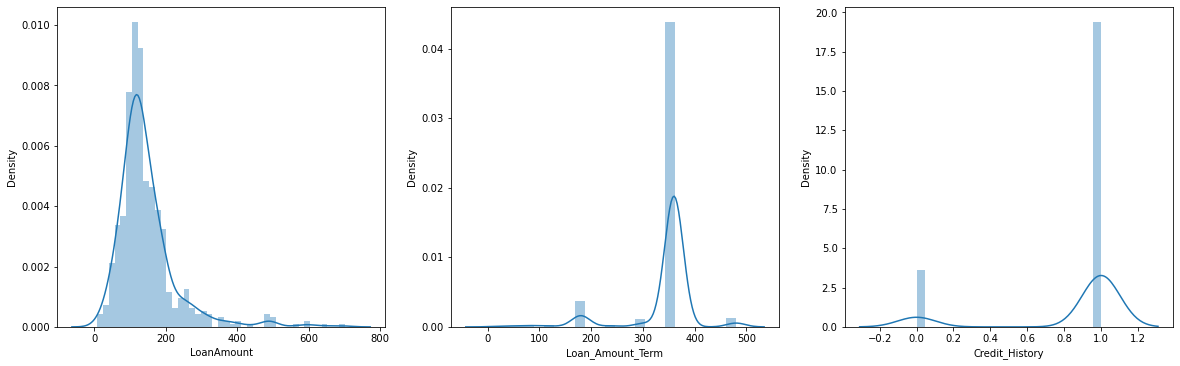

In [24]:
col=['LoanAmount','Loan_Amount_Term','Credit_History']
plt.figure(figsize=(20,20))
plotnumber =1
for i in col:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i)
        plotnumber +=1
plt.show()

- Loanamount col is rt skewed & not normal distributed.
- Loan_Amount_Term is left skewed and also not normal distributed.
- Credit_History is also left skewed and not normaly distributed

In [25]:
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].median())

- All three numeric has skewness and data is also not normal so missing value is replaced by median

In [26]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- The missing value is replace by median in numeric col and now the there is no missing value present in dataframe.

# Histogram

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Married'}>,
        <AxesSubplot:title={'center':'Dependents'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Self_Employed'}>,
        <AxesSubplot:title={'center':'ApplicantIncome'}>],
       [<AxesSubplot:title={'center':'CoapplicantIncome'}>,
        <AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>,
        <AxesSubplot:title={'center':'Property_Area'}>,
        <AxesSubplot:title={'center':'Loan_Status'}>]], dtype=object)

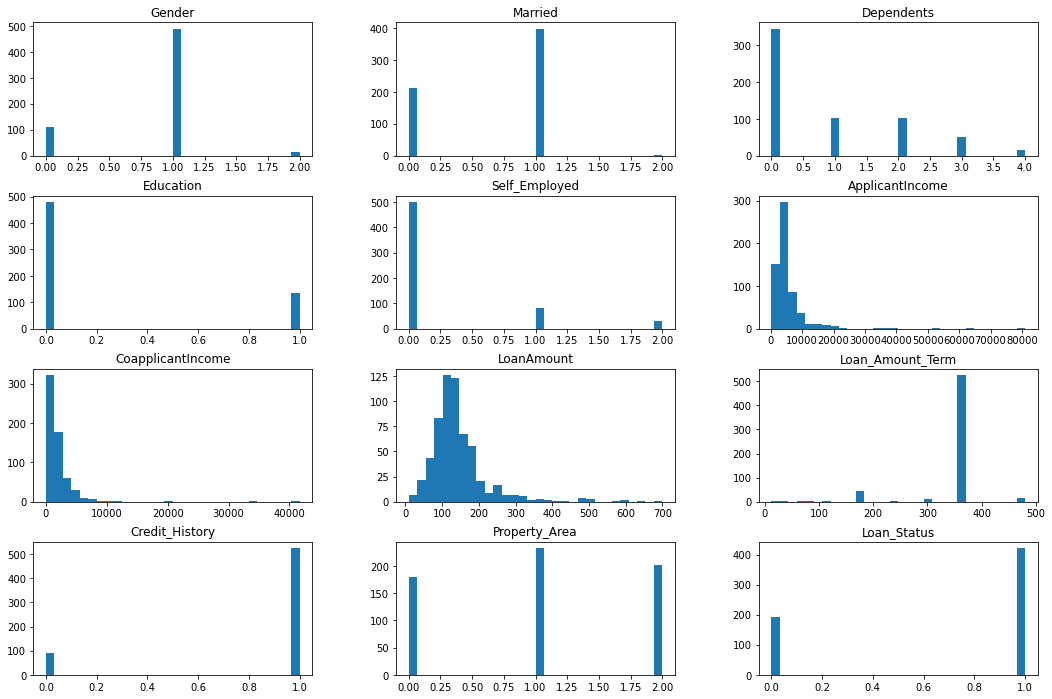

In [27]:
df.hist(grid=False, figsize=(18,12), bins=30)

# Disstplot

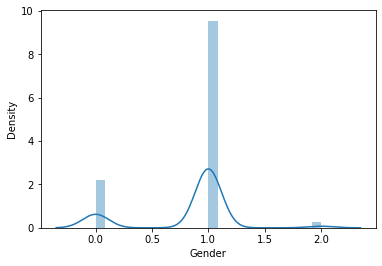

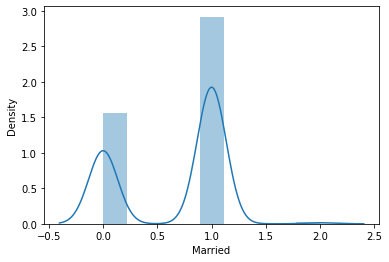

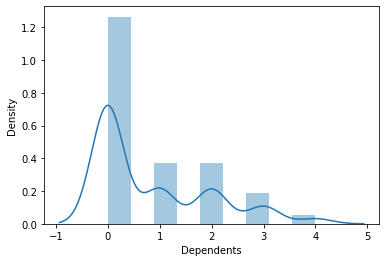

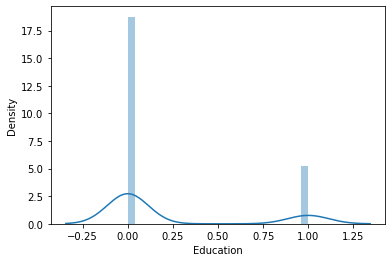

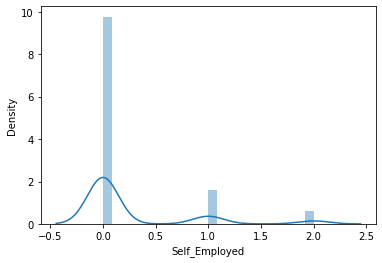

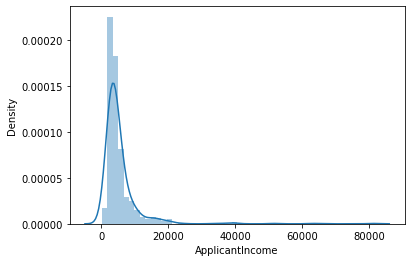

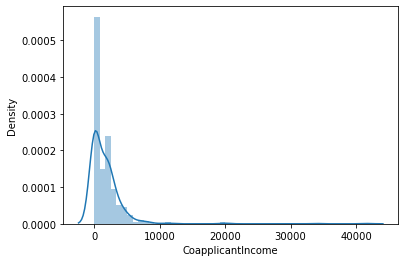

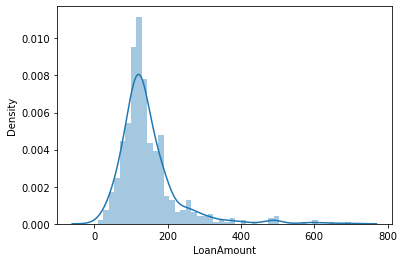

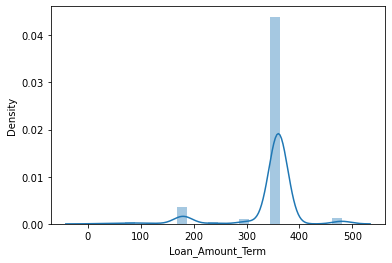

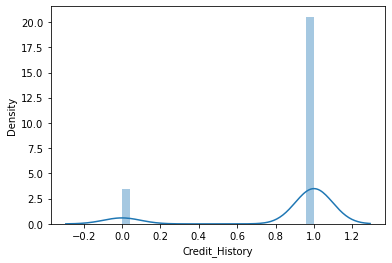

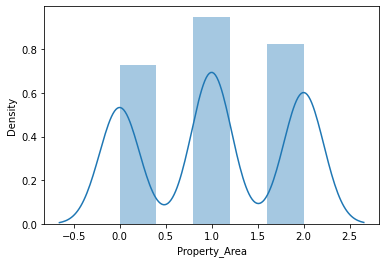

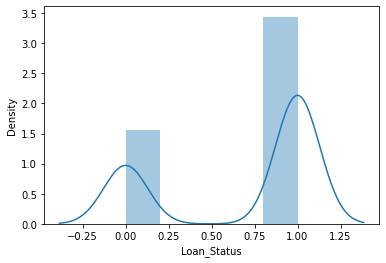

In [28]:
for i in df:
    plt.figure()
    sns.distplot(df[i])

# Pairplot

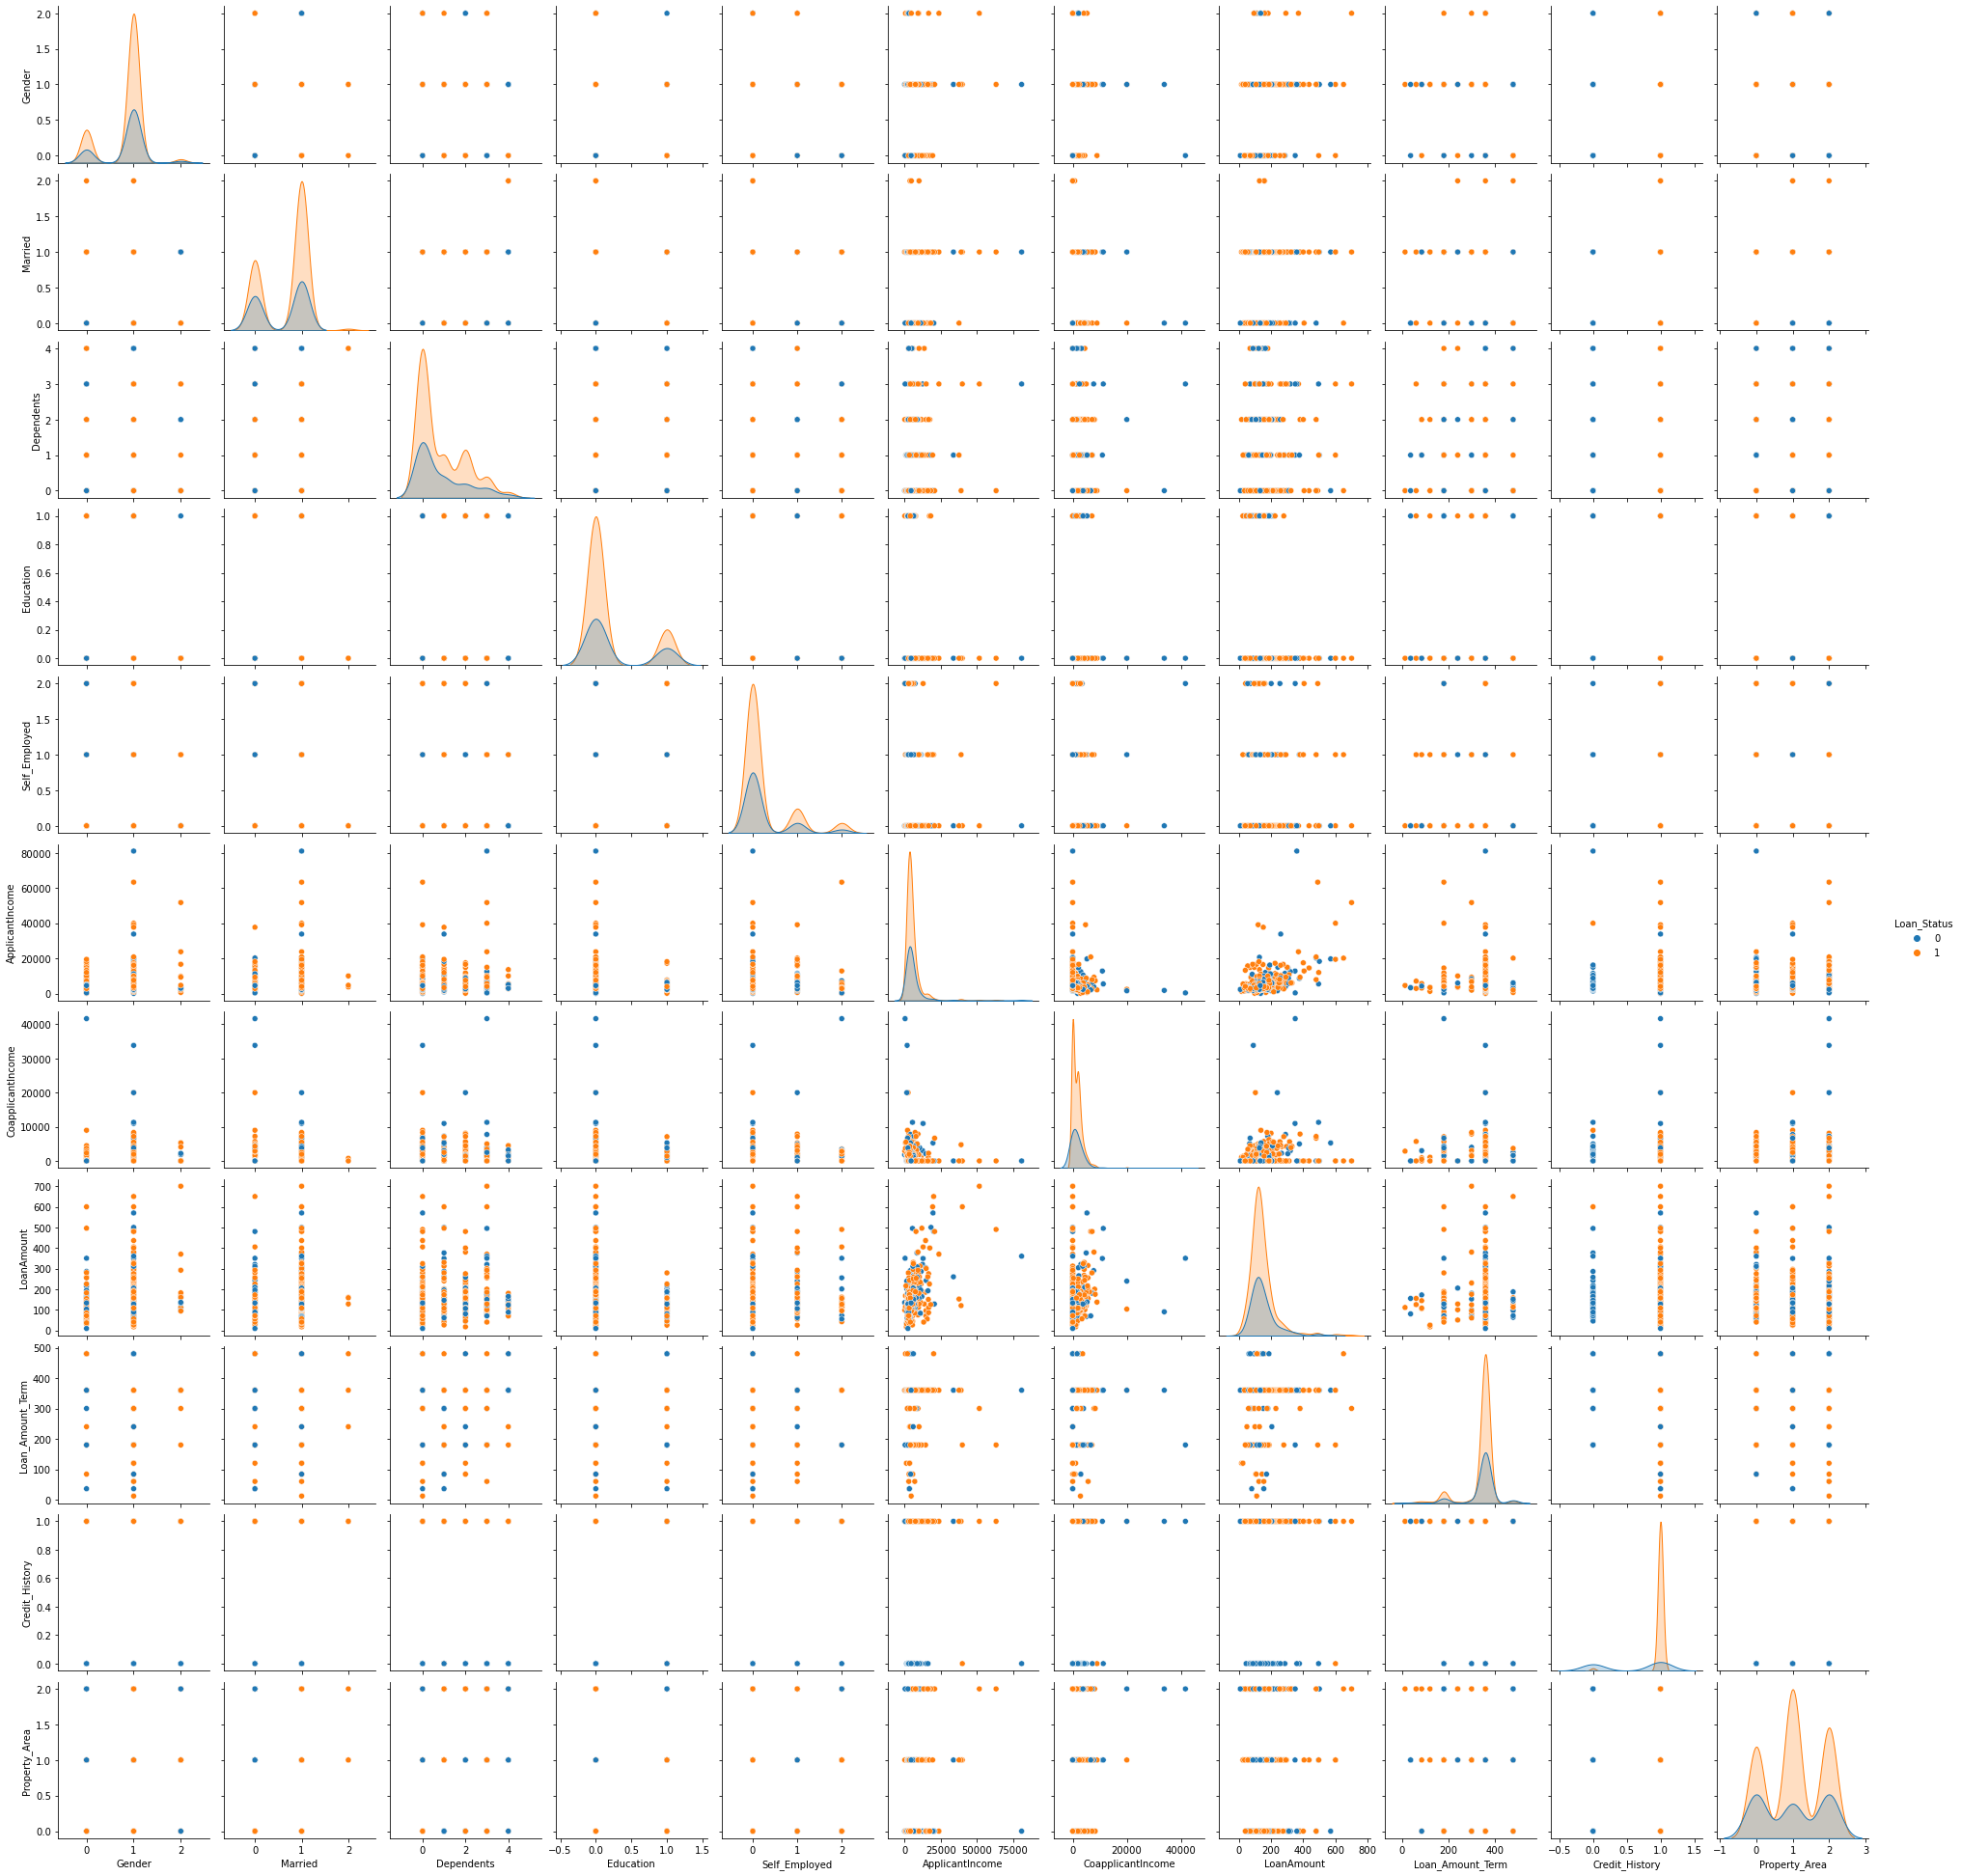

In [29]:
sns.pairplot(df,hue="Loan_Status")

- The data is non linear & not normaly distributed.

# Boxplot for outliers detection

<AxesSubplot:>

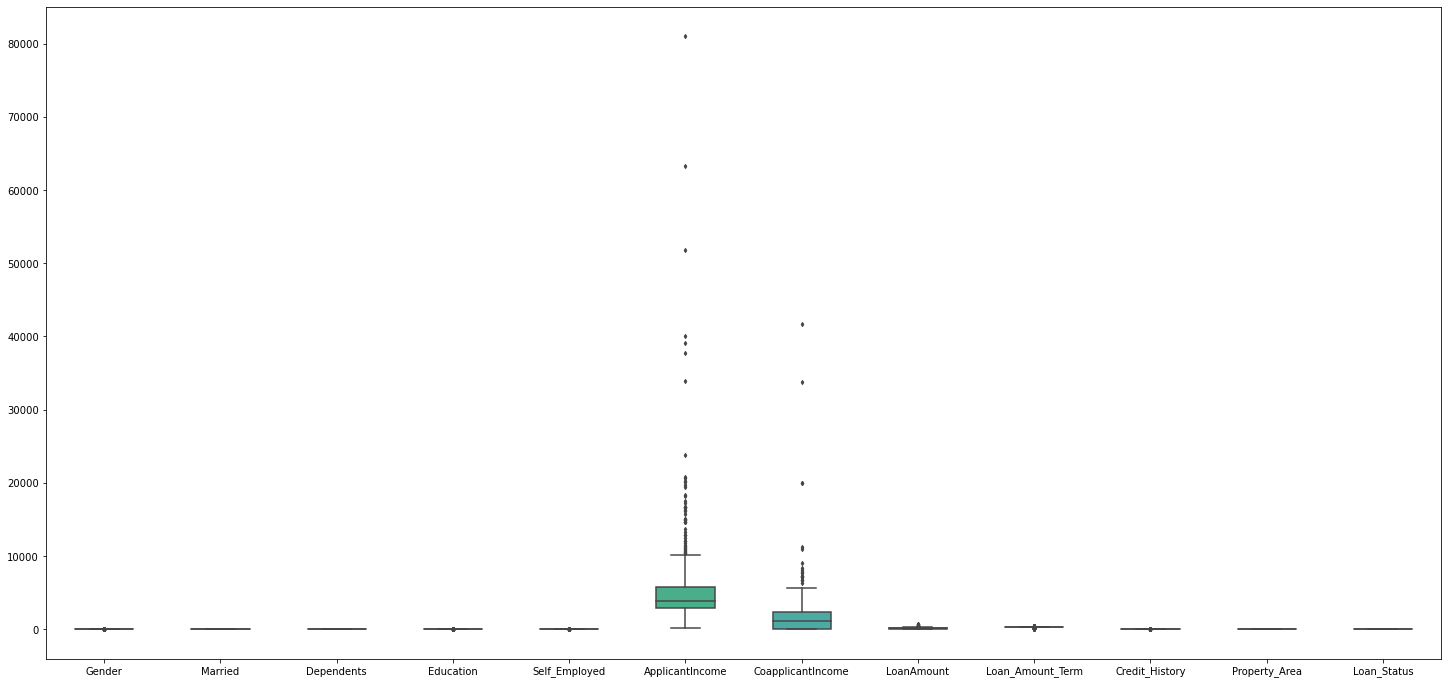

In [30]:
fig, ax =plt.subplots(figsize=(25,12))
sns.boxplot(data=df, width = 0.5,ax=ax, fliersize=3)

- ApplicantIncome,CoapplicantIncome & LoanAmount Variables has high amount of outliers.

# Correlation between the target variable and independent variable

In [31]:
# checking the correlation of features and labels
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.336094,0.149674,0.024382,-0.025022,0.094472,0.073308,0.135505,-0.068522,-0.003844,-0.030903,0.008690
Married,0.336094,1.000000,0.338689,0.006759,-0.038153,0.052119,0.069877,0.144297,-0.096368,0.014896,0.007973,0.096657
Dependents,0.149674,0.338689,1.000000,0.060466,0.005622,0.103416,0.011146,0.128868,-0.075159,-0.082888,0.032600,-0.007318
Education,0.024382,0.006759,0.060466,1.000000,-0.021130,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.025022,-0.038153,0.005622,-0.021130,1.000000,0.095664,0.052218,0.089886,-0.036361,0.062019,-0.013439,0.010880
ApplicantIncome,0.094472,0.052119,0.103416,-0.140760,0.095664,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.073308,0.069877,0.011146,-0.062290,0.052218,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187
LoanAmount,0.135505,0.144297,0.128868,-0.168759,0.089886,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214
Loan_Amount_Term,-0.068522,-0.096368,-0.075159,-0.073928,-0.036361,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,-0.003844,0.014896,-0.082888,-0.073658,0.062019,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556


<AxesSubplot:>

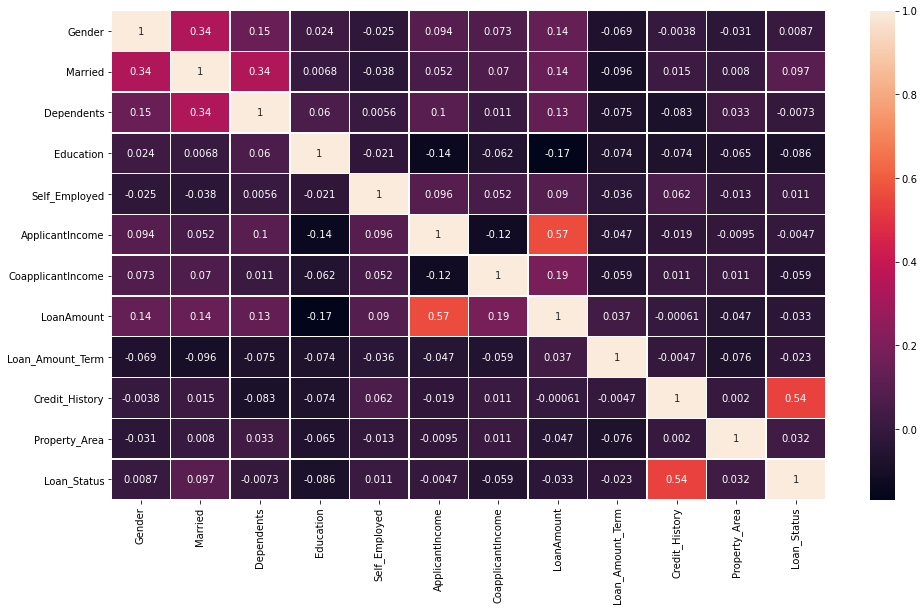

In [32]:
# Heat Map
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=0.5,annot = True)

- Target variable-Loan_status shows +ve corr with Credit_history col & -ve corr with almost all remaining variables.
- Applicantincome shows +ve corr with Loanamount.
- Similar obs can be drawn for remaining variables

# VIF : Multicollinearity Test :

In [33]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif["features"]=df.columns
    print(vif)

In [34]:
vif_calc()

    VIF Factor           features
0     5.360754             Gender
1     3.610140            Married
2     1.813245         Dependents
3     1.305655          Education
4     1.221570      Self_Employed
5     2.896114    ApplicantIncome
6     1.491314  CoapplicantIncome
7     6.773089         LoanAmount
8    10.194432   Loan_Amount_Term
9     9.143532     Credit_History
10    2.584253      Property_Area
11    4.633130        Loan_Status


- Loan_amount_term & Credit_history has high VIF value greater then 8.
- But I have not deleted those cols as they are influencing target cols, Also total cols in datasets is also less.

# Z-Score Removing Outliers

In [35]:
#detecting outliers
dfzscore=np.abs(zscore(df))
print(np.where(dfzscore>3))

(array([  9,  11,  14,  19,  24,  29,  30,  68,  94,  95, 107, 111, 114,
       126, 130, 133, 155, 155, 158, 170, 171, 171, 177, 177, 183, 185,
       218, 231, 236, 242, 262, 268, 278, 295, 308, 313, 333, 333, 333,
       336, 344, 369, 374, 380, 385, 402, 409, 411, 417, 432, 432, 443,
       447, 463, 468, 487, 495, 497, 506, 523, 525, 535, 542, 546, 561,
       575, 579, 581, 585, 600, 600, 601, 604], dtype=int64), array([6, 4, 8, 4, 4, 4, 4, 8, 8, 4, 4, 4, 4, 5, 7, 8, 5, 7, 4, 4, 5, 7,
       6, 7, 5, 5, 4, 4, 4, 8, 8, 4, 7, 4, 7, 8, 4, 5, 7, 4, 4, 7, 4, 4,
       4, 6, 5, 4, 6, 4, 7, 5, 4, 4, 4, 7, 8, 8, 7, 7, 7, 4, 4, 8, 7, 8,
       4, 6, 8, 4, 6, 4, 7], dtype=int64))


In [36]:
dfnew=df[(dfzscore<3).all(axis=1)]
print('dfnew.shape=',dfnew.shape)
df=dfnew

dfnew.shape= (548, 12)


In [37]:
Data_loss=((614-548)/908)*100
Data_loss

7.268722466960352

- The percentage data loss is less then 8% percent after removing outliers.

# Removing Right Skewness:

In [38]:
numeric.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

- ApplicantIncome,CoapplicantINcome & LoanAmount col is rt skewed & not normal distributed.
- Loan_Amount_Term is left skewed and also not normal distributed.
- Credit_History is also left skewed and not normaly distributed.

Gender              -0.980211
Married             -0.527102
Dependents           1.126463
Education            1.299518
Self_Employed        2.164757
ApplicantIncome      1.228783
CoapplicantIncome    1.369775
LoanAmount           1.140938
Loan_Amount_Term    -2.050599
Credit_History      -1.910659
Property_Area       -0.058055
Loan_Status         -0.813560
dtype: float64

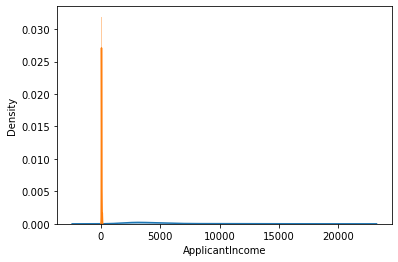

In [39]:
sns.distplot(df['ApplicantIncome'])
df['ApplicantIncome']=np.sqrt(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncome'])
df.skew()
#Orange Spike shows skewness & blue curve shows skewness reduced for variable.

Gender              -0.980211
Married             -0.527102
Dependents           1.126463
Education            1.299518
Self_Employed        2.164757
ApplicantIncome      0.721491
CoapplicantIncome    1.369775
LoanAmount           1.140938
Loan_Amount_Term    -2.050599
Credit_History      -1.910659
Property_Area       -0.058055
Loan_Status         -0.813560
dtype: float64

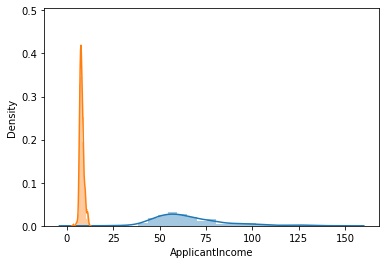

In [40]:
sns.distplot(df['ApplicantIncome'])
df['ApplicantIncome']=np.sqrt(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncome'])
df.skew()
#Orange Spike shows skewness & blue curve shows skewness reduced for variable.

Gender              -0.980211
Married             -0.527102
Dependents           1.126463
Education            1.299518
Self_Employed        2.164757
ApplicantIncome      0.721491
CoapplicantIncome    0.228178
LoanAmount           1.140938
Loan_Amount_Term    -2.050599
Credit_History      -1.910659
Property_Area       -0.058055
Loan_Status         -0.813560
dtype: float64

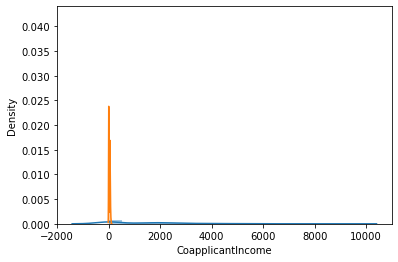

In [41]:
sns.distplot(df['CoapplicantIncome'])
df['CoapplicantIncome']=np.sqrt(df['CoapplicantIncome'])
sns.distplot(df['CoapplicantIncome'])
df.skew()
#Orange Spike shows skewness & blue curve shows skewness reduced for variable.

Gender              -0.980211
Married             -0.527102
Dependents           1.126463
Education            1.299518
Self_Employed        2.164757
ApplicantIncome      0.721491
CoapplicantIncome    0.228178
LoanAmount           0.358604
Loan_Amount_Term    -2.050599
Credit_History      -1.910659
Property_Area       -0.058055
Loan_Status         -0.813560
dtype: float64

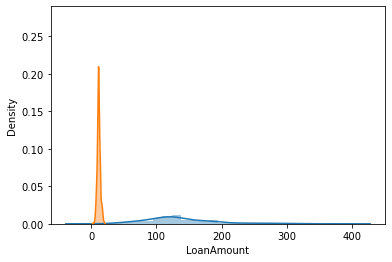

In [42]:
sns.distplot(df['LoanAmount'])
df['LoanAmount']=np.sqrt(df['LoanAmount'])
sns.distplot(df['LoanAmount'])
df.skew()
#Orange Spike shows skewness & blue curve shows skewness reduced for variable.

# Class Imbalnce treatment for target col.

- 1 is Loan_status as Y
- 0 is Loan_status as N which will be upsampled to the same level of 1

In [43]:
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

- dataset is divide into indepndent & target variables.
- x is a independent variables & y is a target variable

In [44]:
x.shape

(548, 11)

- x without target col.
- x has 548 rows & 11 Cols

In [45]:
df['Loan_Status'].value_counts()

1    377
0    171
Name: Loan_Status, dtype: int64

In [46]:
# Concatenate our training data back together
x = pd.concat([x, y], axis=1)

In [47]:
y = x[x.Loan_Status==1] # y instance
n = x[x.Loan_Status==0] # N instance

In [48]:
# upsample minority
dia_upsampled = resample(n,
                          replace=True, # sample with replacement
                          n_samples=len(y),   # match number in majority
                          random_state=30)  # reproducible results

N class is upsampled above

In [49]:
upsampled = pd.concat([y, dia_upsampled])

Combining Y class with upsampled N class

In [50]:
upsampled['Loan_Status'].value_counts()

0    377
1    377
Name: Loan_Status, dtype: int64

- The target col class is equally balanced as can be seen above.

In [51]:
x = upsampled

In [52]:
x=upsampled.drop("Loan_Status",axis=1)
y=upsampled["Loan_Status"]

- x without target col

In [53]:
x.shape, y.shape

((754, 11), (754,))

- x with 754 rows & 11 col.
- the number of rows is increased after upsampling.
- y with same 754 rows as target col.

In [54]:
x.skew()

Gender              -0.893531
Married             -0.426856
Dependents           1.139842
Education            1.152917
Self_Employed        2.120493
ApplicantIncome      0.572475
CoapplicantIncome    0.264558
LoanAmount           0.475420
Loan_Amount_Term    -1.654266
Credit_History      -1.088948
Property_Area       -0.023804
dtype: float64

# Power transform for removing positive & negative skewness

In [55]:
x=power_transform(x,method='yeo-johnson') # Applying power transform to whole dataframe

In [56]:
scale=StandardScaler() # Standard scaler instance
x=scale.fit_transform(x) # applied to independent variables
x

array([[ 0.34935048, -1.26531428, -0.84416262, ...,  0.07916161,
         0.59471038,  1.19553388],
       [ 0.34935048,  0.74625053, -0.84416262, ...,  0.07916161,
         0.59471038,  1.19553388],
       [ 0.34935048,  0.74625053, -0.84416262, ...,  0.07916161,
         0.59471038,  1.19553388],
       ...,
       [ 3.88328648, -1.26531428, -0.84416262, ...,  0.07916161,
         0.59471038,  1.19553388],
       [ 0.34935048,  0.74625053,  0.76145502, ...,  0.07916161,
        -1.68149076,  1.19553388],
       [ 0.34935048, -1.26531428,  1.24118716, ...,  0.07916161,
        -1.68149076, -1.30956737]])

# Decision Tree is Configured for 200 Random State

In [57]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm = DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100, "at random_state", i)

81.12449799196787 at random_state 0
86.74698795180723 at random_state 1
87.95180722891565 at random_state 2
86.34538152610442 at random_state 3
83.53413654618474 at random_state 4
83.53413654618474 at random_state 5
82.73092369477911 at random_state 6
83.13253012048193 at random_state 7
79.91967871485943 at random_state 8
85.54216867469879 at random_state 9
88.35341365461848 at random_state 10
81.52610441767068 at random_state 11
81.92771084337349 at random_state 12
82.73092369477911 at random_state 13
82.32931726907631 at random_state 14
84.33734939759037 at random_state 15
84.73895582329317 at random_state 16
84.73895582329317 at random_state 17
85.14056224899599 at random_state 18
84.33734939759037 at random_state 19
81.52610441767068 at random_state 20
83.53413654618474 at random_state 21
82.32931726907631 at random_state 22
86.34538152610442 at random_state 23
84.73895582329317 at random_state 24
84.33734939759037 at random_state 25
83.13253012048193 at random_state 26
80.72289156

In [58]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9118942731277533  on Random_state  126


- best random sate is 106 with accuracy of 90.7%.

# Splitting Training Set & Test Set.

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state = 106)

- independent(x) & Target Variable(y) is divided into Train & Test Set.
- 70% data is set for training & 30% data is reserved for testing.

# Logistic Regression

In [62]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

[1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0
 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1
 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1
 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1
 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 0 0 1 0]
0.7224669603524229
              precision    recall  f1-score   support

           0       0.90      0.57      0.70       127
           1       0.63      0.92      0.74       100

    accuracy                           0.72       227
   macro avg       0.76      0.74      0.72       227
weighted avg       0.78      0.72      0.72       227



- Logistic regr acc = 72%.

# Decision Tree Classifier

In [63]:
# Applying Decision Tree Regression on train and test data
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
pred = DTC.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

0.9074889867841409
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       127
           1       0.90      0.89      0.89       100

    accuracy                           0.91       227
   macro avg       0.91      0.91      0.91       227
weighted avg       0.91      0.91      0.91       227



- DTC learned the model with 91%.

# Random Forest Classifier

In [67]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
pred = RFC.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

0.9074889867841409
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       127
           1       0.88      0.91      0.90       100

    accuracy                           0.91       227
   macro avg       0.91      0.91      0.91       227
weighted avg       0.91      0.91      0.91       227



- RFC learned the model with 91%.

# Support Vector Classifier

In [68]:
SV = SVC()
SV.fit(x_train, y_train)
pred = SV.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc)

0.8149779735682819
              precision    recall  f1-score   support

           0       0.95      0.71      0.81       127
           1       0.72      0.95      0.82       100

    accuracy                           0.81       227
   macro avg       0.83      0.83      0.81       227
weighted avg       0.85      0.81      0.81       227



- SV learned the model with 81%.

# KNN Classifier

In [69]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(accuracy_score(y_test,pred))
acc = classification_report(y_test, pred)
print(acc) 

0.762114537444934
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       127
           1       0.71      0.77      0.74       100

    accuracy                           0.76       227
   macro avg       0.76      0.76      0.76       227
weighted avg       0.77      0.76      0.76       227



- SV learned the model with 76%.

# K-fold Cross Validation

In [70]:
# Obs : Creating CV Object with shuffle = true to avoid -ve CV Values as o/p
cross_validation=KFold(5, shuffle =True)

In [71]:
# Logistic regression
print(cross_val_score(lg,x,y,cv=cross_validation).mean())

0.7373686534216335


In [72]:
# Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=cross_validation).mean())

0.8527328918322296


In [73]:
# Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=cross_validation).mean())

0.9257483443708608


In [74]:
# Support vector Classifier
print(cross_val_score(SV,x,y,cv=cross_validation).mean())

0.7944547461368654


In [75]:
# KNN classifier 
print(cross_val_score(knn,x,y,cv=cross_validation).mean())

0.7493863134657837


Diff value between Acc - CV
- lg = 72 - 73.7 = 1.7
- dtc = 91 - 85.3 = 5.7
- rfc = 91 - 92.6 = 1.6
- sv = 81 - 79.4 = 1.6
- knn = 76 - 75 = 1.0

# Best Model Selection

- KNN is the best model as it has least diff value between Knn Acc - CV value compared to the rest.

# Hyperparameter & GridsearchCV

In [76]:
parameter = {'n_neighbors' : [1,2,4,5],
            'weights':['uniform', 'distance'],
            'algorithm':['auto', 'ball_tree'],
            'leaf_size': [30],
            'metric':['minkowski']}

In [78]:
#Creating Gridserach CV Instance
GCV=GridSearchCV(KNeighborsClassifier(),parameter,cv=cross_validation)
GCV.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree'], 'leaf_size': [30],
                         'metric': ['minkowski'], 'n_neighbors': [1, 2, 4, 5],
                         'weights': ['uniform', 'distance']})

- Applying Gridsearchcv to training set with knn hyperparameters values.

In [79]:
GCV.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'n_neighbors': 5,
 'weights': 'distance'}

In [80]:
Final_mod = KNeighborsClassifier(algorithm = 'auto', leaf_size = 30,metric= 'minkowski',n_neighbors = 1,weights= 'uniform')
Final_mod.fit(x_train, y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

90.7488986784141


- Final Accuracy of the best model = 90.75%.

# AUC-ROC Curve

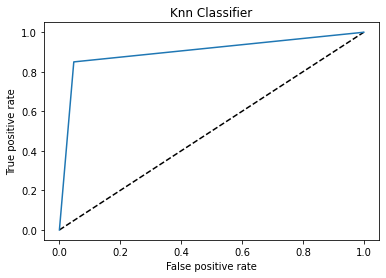

0.9013779527559056

In [82]:
y_pred_prob= Final_mod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Knn Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Knn Classifier')
plt.show()
auc_score=roc_auc_score(y_test,Final_mod.predict(x_test))
auc_score

 ROC Curve : Classifiers that give curves closer to top left corner indicates that model will give better performance & if the curve comming closer to 45 degree diagonal of the ROC space the less accurate the model will be, so in above case the curve is closer to top left corner hence I believe the model will give better performance.

# Exporting Model with Joblib Library

In [83]:
# Model is exported as .pkl file with the help of joblib library.
import joblib
joblib.dump(Final_mod,"FinalModel.pkl")

['FinalModel.pkl']

# Load the Model

In [85]:
Model = joblib.load("FinalModel.pkl")
a = np.array(y_test)
prediction = Model.predict(x_test)
df_final = pd.DataFrame({"Original":a,"Predicted":prediction},index=range(len(a)))
df_final

,Original,Predicted
0,1,1
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
222,1,1
223,0,0
224,1,0
225,0,0


# Concluding Remarks

We achieved the objective of this project to build a model which predicts whether the applicant's loan will be approved or rejected. Based on customer details like, Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others, our model will identify the customers segments, those are eligible for loan amount.